# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhamad Hafidz Sohibul Fazri
- **Email:** mh1900756@gmail.com
- **ID Dicoding:** muhamadhafidz

## Menentukan Pertanyaan Bisnis

- What is the average number of bicycles rented each season?
- Between casual and registered rent bicycle customer, which one is the most popular in each season?
- At what time do casual customer rent bicycles more often than registered customer?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

- **Load day Data**

in this process, I will load the datasets then display the top 5 using .head() method

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- **Load hour Data**

in this process, I will load the datasets then display the top 5 using .head() method

In [3]:
hour_df = pd.read_csv('data/hour.csv')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- hour.csv : bike sharing counts aggregated on hourly basis.
- day.csv - bike sharing counts aggregated on daily basis.
- Weekday is represented using a number, where 0 = sunday, 1 = monday, 2 = tuesday, 3 = wednesday, 4 = thursday, 5 = friday, and 6 = saturday
- The `yr` and `mnth` columns are representations of year and month
- Season is represented using a number, where 1 = spring, 2 = summer, 3 = fall, and 4 = winter
- because the hour_df dataset is more detailed, I will use the hour_df dataset to carry out the analysis

### Assessing Data

- **View info for each column in both dataset**

in this process, I want to see there is missing value or not and the data type in each column

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- **Check the duplicated data**

In this process, i want to see there is duplicate data or not

In [5]:
print('Amount of duplicated data: ', hour_df.duplicated().sum())

Amount of duplicated data:  0


- **Check descriptive statistic hour_df**

In this process, i want to see how descriptive statistics from hour_df

In [6]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- There were no missing values ​​in both datasets
- There have wrong data type on `dteday` column in both dataset
- There were no have duplicate data in both datasets
- there is no noise or outliers in the both datasets

### Cleaning Data

- **Change the data type of `dteday` column**

In [7]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

- **Change the data in the weekday column**

In this process, I will change the data in the weekday column to make it easier to read

- hour_df

In [8]:
hour_df['weekday'] = hour_df['weekday'].replace(
    {
        0: 'Sunday',
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday'
    }
)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


- **Change the data in the season column**

In this process, I will change the data in the season column to make it easier to read

- hour_df

In [9]:
hour_df['season'] = hour_df['season'].replace(
    {
        1: 'Spring',
        2: 'Summer',
        3: 'Fall',
        4: 'Winter'
    }
)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Changing the data type of `dteday` column into datetime
- Changing the data in the weekday column to make it easier to read
- Changing the data in the season column to make it easier to read

## Exploratory Data Analysis (EDA)

### Explore hour_df

For the first, i want to see statistic parameter using `describe()` from hour_df data

In [10]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,NaN,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,NaN,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,NaN,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,NaN,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,NaN,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Then, I will use grouped aggregation technique to analyze the bike-sharing data by season. By grouping the data by the `season` column, it calculates key statistics for the `casual` and `registered` users, including the number of unique values (nunique), the maximum (max), minimum (min), and average (mean) rentals within each season. This analysis helps identify seasonal patterns and trends in user behavior, providing insights into how both casual and registered users vary across different seasons in terms of rental counts.

In [11]:
hour_df.groupby(by='season').agg(
    {
        'casual': ['nunique', 'max', 'min', 'mean'],
        'registered': ['nunique', 'max', 'min', 'mean']
    }
).reset_index()

season  casual                     registered                     
          nunique  max min       mean    nunique  max min        mean
0    Fall     256  350   0  50.287144        648  886   0  185.729093
1  Spring     156  367   0  14.290901        442  681   0   96.823668
2  Summer     288  361   0  46.160581        618  782   0  162.183488
3  Winter     240  362   0  30.666824        610  876   0  168.202032

Then, I want to filtering and grouped aggregation analysis on the dataset. First, it filters the hour_df DataFrame to only include data from the year 2011 (where yr == 0), creating the data_2011_df. Then, it groups the filtered data by the mnth column (representing months) and calculates the sum of the casual, registered, and cnt columns for each month.

In [12]:
data_2011_df = hour_df[hour_df['yr'] == 0]
data_2011_df.groupby(by='mnth')[['casual', 'registered','cnt']].sum().reset_index()

,mnth,casual,registered,cnt
0,1,3073,35116,38189
1,2,6242,41973,48215
2,3,12826,51219,64045
3,4,22346,72524,94870
4,5,31050,104771,135821
5,6,30612,112900,143512
6,7,36452,104889,141341
7,8,28842,107849,136691
8,9,26545,100873,127418
9,10,25222,98289,123511


**Insight:**
- The distribution of bike rentals `cnt` shows that, on average, about 189.46 bikes are rented per observation period, likely an hour based on the `hr` column. However, the standard deviation of 181.38 indicates significant variability in rental counts. The interquartile range, spanning from 40 rentals at the 25th percentile to 281 rentals at the 75th percentile, highlights substantial fluctuations in the data. Furthermore, the maximum number of rentals recorded in a single period reaches 977 bikes, underscoring occasional peaks in demand.
- The results from groupped aggregation show seasonal patterns in bike rentals for both casual and registered users. In Fall, casual users have 256 unique rental values with an average of 50.29 rentals, and registered users have 648 unique rentals with an average of 185.73. Spring sees the lowest activity, with casual users averaging only 14.29 rentals and registered users averaging 96.82. Summer shows increased activity, with casual users averaging 46.16 rentals and registered users 162.18. Winter has moderate engagement, with casual users averaging 30.67 rentals and registered users 168.20. Across all seasons, registered users consistently rent more bikes than casual users.
- The monthly rental data for 2011 shows that May, June, and July were peak months, with the highest total bike rentals, particularly driven by registered users, indicating strong demand during late spring and early summer. In contrast, January and December had the lowest rental activity, likely due to colder weather conditions reducing outdoor biking. Throughout the year, registered users consistently rented more bikes than casual users, suggesting that regular riders, possibly commuters, played a major role in sustaining the bike-sharing system's usage across all months.

## Visualization & Explanatory Analysis

### Pertanyaan 1: What is the average number of bicycles rented each season?

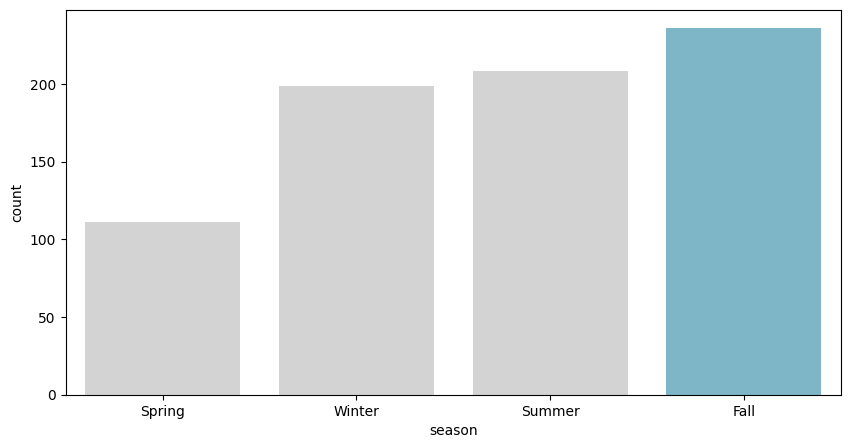

In [13]:
mean_season_hour_df = hour_df.groupby(by='season')['cnt'].mean().sort_values().reset_index()

colors = ["#D3D3D3","#D3D3D3", "#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10, 5))

sns.barplot(
    x='season',
    y='cnt',
    data=mean_season_hour_df,
    palette=colors,
    hue='season',
    legend=False
)

plt.xlabel('season')
plt.ylabel('count')
plt.show()

### Pertanyaan 2: Between casual and registered bike retailers, which one is the most popular in each season?

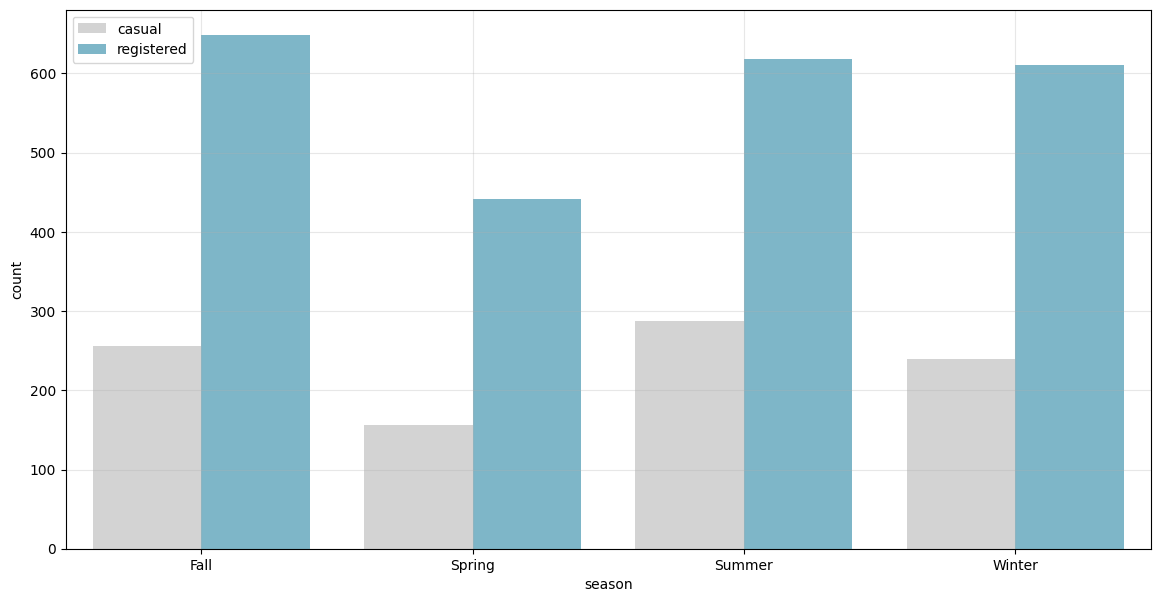

In [17]:
casual_registered_df = hour_df.groupby(by='season')[['casual', 'registered']].nunique().reset_index()
casual_registered_df = pd.melt(
    casual_registered_df, 
    id_vars=['season'], 
    value_vars=['casual', 'registered'], 
    var_name='cust_type', 
    value_name='count'
)

colors = ["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(14, 7))

sns.barplot(
    x='season',
    y='count',
    data=casual_registered_df,
    palette=colors,
    hue='cust_type'
)

plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

### Pertanyaan 3: At what time do casual customer rent bicycles more often than registered customer?

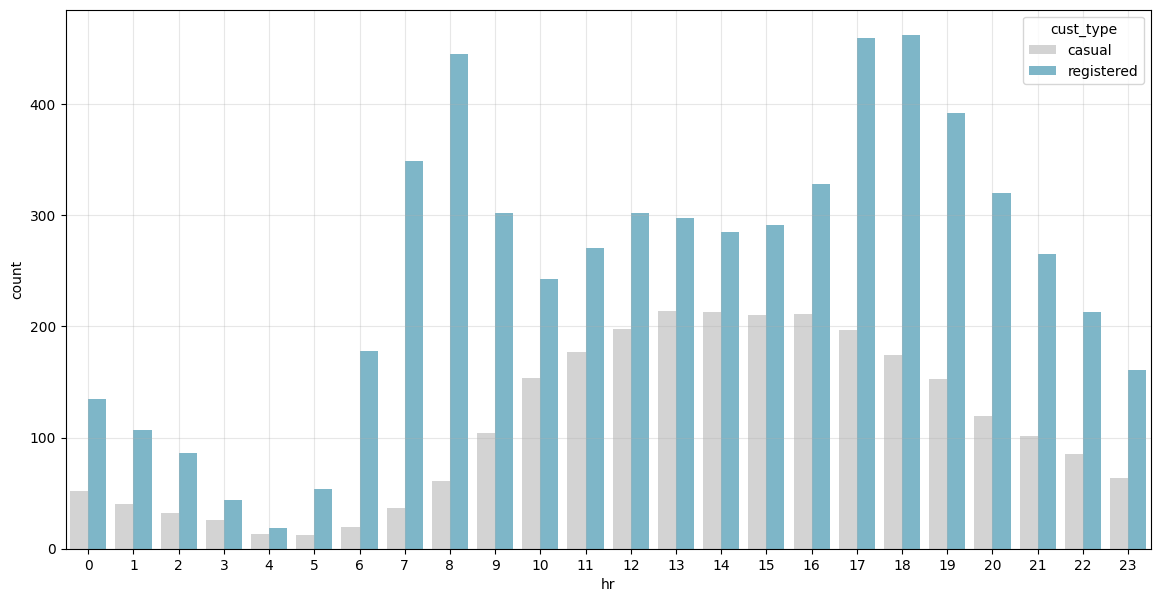

In [16]:
_hour_df = hour_df.groupby('hr')[['casual', 'registered']].nunique().reset_index()
_hour_df = pd.melt(
    _hour_df,
    id_vars=['hr'],
    value_vars=['casual', 'registered'],
    var_name='cust_type',
    value_name='count'
)

colors = ["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(14, 7))

sns.barplot(
    x='hr',
    y='count',
    data=_hour_df,
    palette=colors,
    hue='cust_type'
)

plt.grid(True, alpha=0.3)
plt.show()

**Insight:**
- Fall is the most popular season for bike rentals and spring is the season that has the lowest average bicycle rental
- Registered customers always dominate bicycle rentals throughout the season
- Registered customers always dominate bicycle rentals throughout the day

## Analisis Lanjutan (Opsional)

## Conclusion

- Fall as the Peak Season for Bike Rentals: Fall is the most popular season for bike rentals, with the highest average rentals compared to other seasons. This could be due to ideal weather conditions or other factors that encourage more bike usage during this season. In contrast, Spring has the lowest average rentals, possibly indicating less favorable weather or lower outdoor activity during this time.

- Dominance of Registered Users: Throughout all seasons, registered users consistently dominate bike rentals compared to casual users. This suggests that loyal customers, or those subscribed to the service, tend to rent bikes more frequently than occasional users.

- Registered Users' Dominance Throughout the Day: Registered users also dominate bike rentals across all hours of the day. This indicates that registered users likely incorporate bike rentals into their daily routines, such as commuting or other regular activities, whereas casual users rent bikes less frequently throughout the day.